In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df=pd.read_csv("HomePrices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


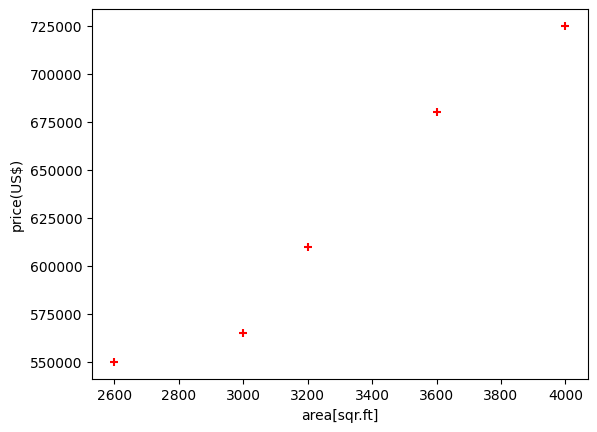

In [5]:
%matplotlib inline
plt.xlabel('area[sqr.ft]')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [25]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [26]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [27]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [29]:
reg.predict([[3300]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [31]:
reg.intercept_


180616.43835616432

In [30]:
reg.coef_


array([135.78767123])

In [32]:
reg.predict([[5000]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [33]:
area_df = pd.read_csv("areas.csv")
area_df


,area
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000
9,10000


In [34]:
p = reg.predict(area_df)
p


array([ 316404.10958904,  452191.78082192,  587979.45205479,
        723767.12328767,  859554.79452055,  995342.46575342,
       1131130.1369863 , 1266917.80821918, 1402705.47945205,
       1538493.15068493])

In [35]:
area_df['prices']=p
area_df


,area,prices
0,1000,3.164041e+05
1,2000,4.521918e+05
2,3000,5.879795e+05
3,4000,7.237671e+05
4,5000,8.595548e+05
5,6000,9.953425e+05
6,7000,1.131130e+06
7,8000,1.266918e+06
8,9000,1.402705e+06
9,10000,1.538493e+06


In [36]:
area_df.to_csv("prediction.csv")
